In [63]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import warnings;
warnings.filterwarnings("ignore");

In [64]:
df = pd.read_csv('ford.csv');
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [65]:
print(df.head());

     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0


In [66]:
print(df.shape);


(17966, 9)


In [67]:
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
None


In [68]:
print(df.describe());

               year         price        mileage           tax           mpg  \
count  17966.000000  17966.000000   17966.000000  17966.000000  17966.000000   
mean    2016.866470  12279.534844   23362.608761    113.329456     57.906980   
std        2.050336   4741.343657   19472.054349     62.012456     10.125696   
min     1996.000000    495.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000    9987.000000     30.000000     52.300000   
50%     2017.000000  11291.000000   18242.500000    145.000000     58.900000   
75%     2018.000000  15299.000000   31060.000000    145.000000     65.700000   
max     2060.000000  54995.000000  177644.000000    580.000000    201.800000   

         engineSize  
count  17966.000000  
mean       1.350807  
std        0.432367  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000  


In [69]:
print(df.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


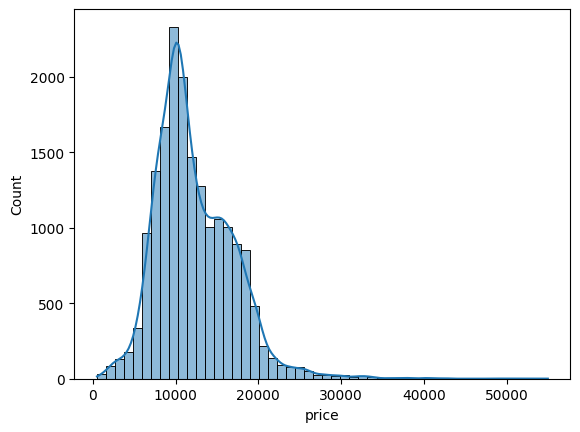

In [70]:
#EDA
sns.histplot(df['price'],bins = 50,kde = True);

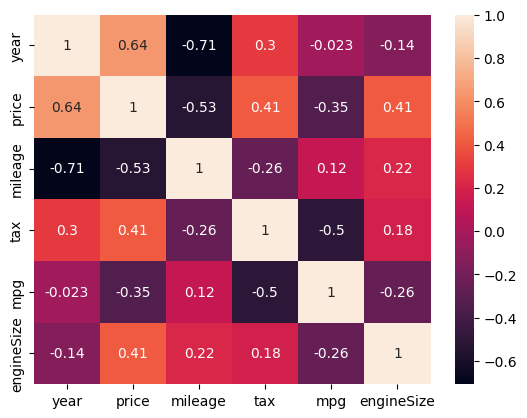

In [71]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

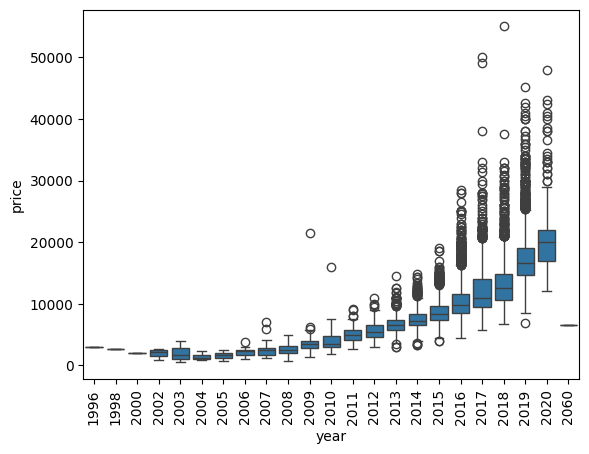

In [72]:
sns.boxplot(data = df,x = 'year',y='price');
plt.xticks(rotation = 90);

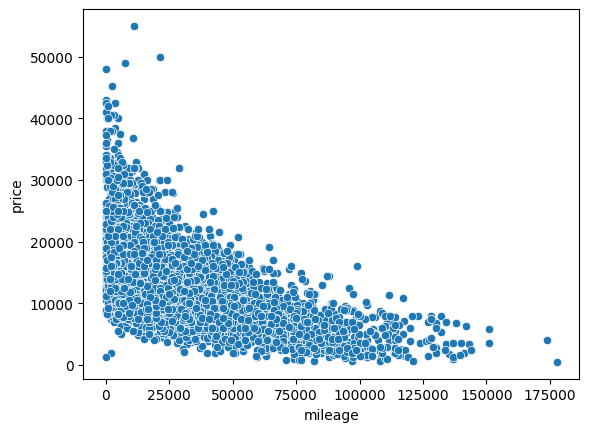

In [73]:
sns.scatterplot(data = df,x = 'mileage', y = 'price');

In [74]:
x = df.drop(columns=['price'],axis = 1);
y = df['price'];



In [75]:
print(df.columns);

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [76]:
# one hot coding
x_one_encode = pd.get_dummies(x,columns=['model','transmission','fuelType'],drop_first=False);

In [77]:
print(x_one_encode);

       year  mileage  tax   mpg  engineSize  model_ B-MAX  model_ C-MAX  \
0      2017    15944  150  57.7         1.0         False         False   
1      2018     9083  150  57.7         1.0         False         False   
2      2017    12456  150  57.7         1.0         False         False   
3      2019    10460  145  40.3         1.5         False         False   
4      2019     1482  145  48.7         1.0         False         False   
...     ...      ...  ...   ...         ...           ...           ...   
17961  2017    16700  150  47.1         1.4          True         False   
17962  2014    40700   30  57.7         1.0          True         False   
17963  2015     7010   20  67.3         1.6         False         False   
17964  2018     5007  145  57.7         1.2         False         False   
17965  2015     5007   22  57.7         1.0         False         False   

       model_ EcoSport  model_ Edge  model_ Escort  ...  \
0                False        False     

In [78]:
x_one_encode = x_one_encode.astype(int);

In [79]:
### label hard code
from sklearn.preprocessing import LabelEncoder;

encode = LabelEncoder();

columns = ['model','transmission','fuelType']

x_label = x;

for i in columns:
    x_label[i] = encode.fit_transform(x_label[i])

In [80]:
x_label

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [81]:
from sklearn.preprocessing import StandardScaler;


In [82]:
numeric_cols = ['year','mileage','tax','mpg','engineSize'];
scaler = StandardScaler();
x_one_encode[numeric_cols] = scaler.fit_transform(x_one_encode[numeric_cols]);


In [83]:
x_one_encode

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [84]:
print(x_label.columns);

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')


In [85]:
x_label[['model', 'year', 'transmission', 'mileage','fuelType', 'tax', 'mpg','engineSize']] = scaler.fit_transform(x_label[['model', 'year', 'transmission', 'mileage','fuelType', 'tax', 'mpg','engineSize']]);

In [86]:
print(x_label);

          model      year  transmission   mileage  fuelType       tax  \
0     -0.460699  0.065128     -2.670032 -0.380998  0.688777  0.591358   
1     -0.211477  0.552866      0.041351 -0.733359  0.688777  0.591358   
2     -0.211477  0.065128      0.041351 -0.560132  0.688777  0.591358   
3     -0.460699  1.040605      0.041351 -0.662640  0.688777  0.510727   
4     -0.460699  1.040605     -2.670032 -1.123724  0.688777  0.510727   
...         ...       ...           ...       ...       ...       ...   
17961 -1.706810  0.065128      0.041351 -0.342172  0.688777  0.591358   
17962 -1.706810 -1.398088      0.041351  0.890398  0.688777 -1.343791   
17963 -0.211477 -0.910349      0.041351 -0.839822 -1.454098 -1.505053   
17964  1.034634  0.552866      0.041351 -0.942690  0.688777  0.510727   
17965  4.025302 -0.910349      0.041351 -0.942690  0.688777 -1.472801   

            mpg  engineSize  
0     -0.020442   -0.811386  
1     -0.020442   -0.811386  
2     -0.020442   -0.811386  
3  

In [88]:
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score;


y = df['price'];

x_train,x_test,y_train,y_test = train_test_split(x_one_encode,y,test_size=0.20,random_state=42);

In [89]:
model = LinearRegression();
model.fit(x_train,y_train);

In [90]:
y_pred = model.predict(x_test);

In [91]:
print(y_pred);

[ 6866.3580764   9347.6810129   9362.18320785 ... 31454.95287518
  9781.20362786 15253.49970894]


In [92]:
print(y_test);

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64


In [93]:
r2 = r2_score(y_test,y_pred);
r2

0.8464177711972801

In [94]:
n = x_test.shape[0];
p = x_test.shape[1];

adjusted_r2 = 1-((1-r2)*(n-1))/(n-p-1)

print("adjusted r2",adjusted_r2);

adjusted r2 0.8448197558807164


In [95]:
y = df['price'];

x_train,x_test,y_train,y_test = train_test_split(x_label,y,test_size=0.20,random_state=42);

In [96]:
model2 = LinearRegression();
model2.fit(x_train,y_train);

In [97]:
y_pred = model2.predict(x_test);

In [99]:
print(y_pred);

[ 6152.07567671  9374.39134399  9464.92264335 ... 21787.05312508
  9776.43926374 15806.24990719]


In [100]:
print(y_test);

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64


In [101]:
r2 = r2_score(y_test,y_pred);
r2

0.7365884288851354

In [102]:
n = x_test.shape[0];
p = x_test.shape[1];

adjusted_r2 = 1-((1-r2)*(n-1))/(n-p-1)

print("adjusted r2",adjusted_r2);

adjusted r2 0.7360006206371803
